Центр непрерывного образования

# Программа «Python для автоматизации и анализа данных»
## Реализация класса kNN

*Автор: Татьяна Рогович, НИУ ВШЭ*

# Метод k-ближайших соседей (kNN)

Давайте перейдем к более прикладным задачам и сначала познакомимся с методом k-ближайщих соседей. Потом его реализуем в виде класса.

`kNN` расшифровывается как `k Nearest Neighbor` или `k Ближайших Соседей` — это один из самых простых алгоритмов классификации, также иногда используемый в задачах регрессии. Задача классификации в машинном обучении — это задача отнесения объекта к одному из заранее определенных классов на основании его формализованных признаков. Каждый из объектов в этой задаче представляется в виде вектора в N-мерном пространстве, каждое измерение в котором представляет собой описание одного из признаков объекта. Допустим нам нужно классифицировать мониторы: измерениями в нашем пространстве параметров будут величина диагонали в дюймах, соотношение сторон, максимальное разрешение, наличие HDMI-интерфейса, стоимость и др. 


## Теория

Идея за алгоритмом kNN довольно простая. Он просто считает расстояние от новой точки, до всех известных обучающих точек. Расстояние может быть найдено разными способами. Далее выбирает к-ближайщих точек, где к - целое число. И в конце, на основе классов, к которому принадлежит большинство отобранных точек, присваивает класс новой точке.

Давайте посмотрим на работу алгоритма на основе простого примера. Допустим у нас есть датасет по двум переменным, который изображен на рисунке ниже.

![image.png](1.png)

Нашей задачей будет классифицировать новую точку 'X' в один из классов: `Фиолетовый` или `Красный`. Координаты нашей точки будет равны: x = 45 и y = 50. Пусть количество соседей (K) равно `3`. Алгоритм КНН посчитает расстояния от точки Х до всех остальных точек. Затем он находит, ближайщие по расстоянию до точки Х, точки. Они показаны на рисунке ниже. Три ближайшие точки находятся внутри круга.

![image.png](2.png)

Последний шагом алгоритма будет присвоить новой точке класс большинства ближайшех точек вокруг. На изображении выше, видно что два из трех ближайщех точек принадлежат классу `Красные` и одна тчока принадлежит классу `Фиолетовые`. Поэтому новая точка будет классифицирована как `Красный`.

## Датасет

В качестве датасет мы будем использовать знаменитый датасет `iris`. Датасет состоит из четырех аттрибутов: `sepal-width`, `sepal-length`, `petal-width` и `petal-length`. Это аттрибуты конкретных типов расстения ирис. Задачей является предсказать к какому типу ириса относится конкретное расстение. Есть три класса в нашем датасете: `Iris-setosa`, `Iris-versicolor` и `Iris-virginica`.

Каждое расстение имеет уникальные признаки: `sepal length` (длина чашелистика), `sepal width` (ширина чашелистика), `petal length` (длина лепестка) и `petal width` (ширина лепестка). 

Давайте посмотрим на данные в pandas, но работать для реализации классов будем со списками.

In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Назовем колонки датасета
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# создадим датасет
dataset = pd.read_csv(url, names=names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Будем работать с двумя первыми колонками (sepal), а предсказывать будем тип ириса. Также мы разбили данные на две части - будем считать, что для подвыборки test мы не знаем, какие это ирисы (на самом деле знаем и потом проверим, как сработал наш алгоритм), и будем на основе двух признаков высчитывать расстояние от них до тех ирисов, метки которых нам известны (train).

In [2]:
X = [[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9, 3.1],
       [5.5, 2.3],
       [6.5, 2.8],
       [5.7, 2.8],
       [6.3, 3.3],
       [4.9, 2.4],
       [6.6, 2.9],
       [5.2, 2.7],
       [5. , 2. ],
       [5.9, 3. ],
       [6. , 2.2],
       [6.1, 2.9],
       [5.6, 2.9],
       [6.7, 3.1],
       [5.6, 3. ],
       [5.8, 2.7],
       [6.2, 2.2],
       [5.6, 2.5],
       [5.9, 3.2],
       [6.1, 2.8],
       [6.3, 2.5],
       [6.1, 2.8],
       [6.4, 2.9],
       [6.6, 3. ],
       [6.8, 2.8],
       [6.7, 3. ],
       [6. , 2.9],
       [5.7, 2.6],
       [5.5, 2.4],
       [5.5, 2.4],
       [5.8, 2.7],
       [6. , 2.7],
       [5.4, 3. ],
       [6. , 3.4],
       [6.7, 3.1],
       [6.3, 2.3],
       [5.6, 3. ],
       [5.5, 2.5],
       [5.5, 2.6],
       [6.1, 3. ],
       [5.8, 2.6],
       [5. , 2.3],
       [5.6, 2.7],
       [5.7, 3. ],
       [5.7, 2.9],
       [6.2, 2.9],
       [5.1, 2.5],
       [5.7, 2.8],
       [6.3, 3.3],
       [5.8, 2.7],
       [7.1, 3. ],
       [6.3, 2.9],
       [6.5, 3. ],
       [7.6, 3. ],
       [4.9, 2.5],
       [7.3, 2.9],
       [6.7, 2.5],
       [7.2, 3.6],
       [6.5, 3.2],
       [6.4, 2.7],
       [6.8, 3. ],
       [5.7, 2.5],
       [5.8, 2.8],
       [6.4, 3.2],
       [6.5, 3. ],
       [7.7, 3.8],
       [7.7, 2.6],
       [6. , 2.2],
       [6.9, 3.2],
       [5.6, 2.8],
       [7.7, 2.8],
       [6.3, 2.7],
       [6.7, 3.3],
       [7.2, 3.2],
       [6.2, 2.8],
       [6.1, 3. ],
       [6.4, 2.8],
       [7.2, 3. ],
       [7.4, 2.8],
       [7.9, 3.8],
       [6.4, 2.8],
       [6.3, 2.8],
       [6.1, 2.6],
       [7.7, 3. ],
       [6.3, 3.4],
       [6.4, 3.1],
       [6. , 3. ],
       [6.9, 3.1],
       [6.7, 3.1],
       [6.9, 3.1],
       [5.8, 2.7],
       [6.8, 3.2],
       [6.7, 3.3],
       [6.7, 3. ],
       [6.3, 2.5],
       [6.5, 3. ],
       [6.2, 3.4],
       [5.9, 3. ]]

In [3]:
y = ['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica']

Давайте посмотрим на визуализацию наших данных.

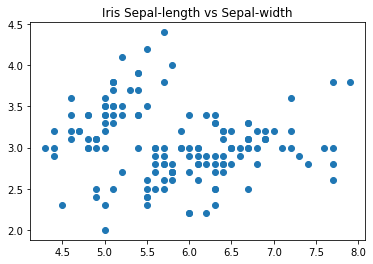

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.scatter([item[0] for item in X], [item[1] for item in X])
plt.title("Iris Sepal-length vs Sepal-width")
plt.show()

Это наши данные полностью, а теперь давайте разобьем их на тестовую и тренировочную выборку с помощью специальной фукнции. 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Мы использовали функцию `train_test_split` из модуля `sklearn`. Код выше разделил датасет на 80% обучающих данных и 20% тестовых данных. Это означает что из 150 записей, обучающая выборка будет состоять из примерно 120 элементов, а тестовая из 30.

In [6]:
len(X_train), len(y_train) # 120 наблюдений в основной выборке

(120, 120)

In [7]:
len(X_test), len(y_test) # вид 30 ирисов будем предсказывать


(30, 30)

In [14]:
print(X_test[0])
print(y_test[0])

[6.1, 2.8]
Iris-versicolor


## Простая реализация kNN
Теперь, имея обучающую выборку, можно реализовать и сам алгоритм классификации. В качестве способа нахождения расстояния от искомой точки до ближайщих соседей, будем использовать `евклидово расстояние`. Для определения расстояния между объектами можно использовать не только евклидово расстояние: также применяются манхэттенское расстояние, косинусная мера, критерий корелляции Пирсона и др.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/220px-Euclidean_distance_2d.svg.png)

In [15]:
def dist(a, b):
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5

In [20]:
def predict(X_train, y_train, x_test, k):
    # создадим список, где будем хранить расстояния и типы ближайших соседей
    distances = []
    targets = {}

    for i in range(len(X_train)):
        # пройдем по всем точкам и посчитаем расстояние до них от тестовой точки
        distances.append([dist(x_test,X_train[i]), i])

    # отсортируем расстояния
    distances = sorted(distances)
    
    # создадим словарь с k ближайщими значениями
    for i in range(k):
        index = distances[i][1]
        if targets.get(y_train[index]) != None:
            targets[y_train[index]] += 1
        else:
            targets[y_train[index]] = 1
        
    # вернем самую часто встречающаюся метку
    return max(targets,key=targets.get)

Мы создали изначально список distances и словарь targets. В distances мы будем хранить расстояния от искомой точки, до всех остальных + индекс этих точек (чтобы можно было их потом найти). А в targets - ближайших k-соседей для точки, с которой работаем

После нахождения всех расстояний, мы сортируем массив по возрастанию дальности точек. Потом мы берем первые k точек в начале списка distances и записываем количество встречающихся лейблов в этих k точках.

И возвращаем лейбл, который встречается чаще всего.

Давайте теперь попробуем предсказать метки для наших 30 точек.

In [24]:
# Создадим список с будущими предсказаниями
predictions = []
# количество соседей
k = 7
# идем по все тестовым данным
for i in range(len(X_test)):
    predictions.append(predict(X_train, y_train, X_test[i], k))
    
print(predictions)

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa']


Удобно, что мы знаем правильные ответы и можем свериться. 

In [27]:
print(y_test)
print(predictions == y_test) # Где-то есть разница

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa']
False


Визуализируем изначальные метки. Переведем текстовые значения меток в численные, чтобы можно было построить график, где точки разного цвета (аргумент, которые отвечает за цвет в matplotlib, принимает категории, записанные числами).

In [33]:
colors = []
for c in y_train:
    if c == "Iris-setosa":
        colors.append(0)
    elif c == "Iris-versicolor":
        colors.append(1)
    else:
        colors.append(2)

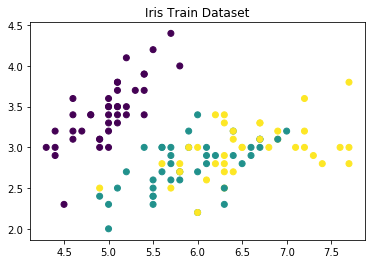

In [35]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter([item[0] for item in X_train], [item[1] for item in X_train], c=colors)
plt.title("Iris Train Dataset")
plt.show()

А теперь то, что предсказали и правильные "ответы."

In [36]:
colors = []
for c in predictions:
    if c == "Iris-setosa":
        colors.append(0)
    elif c == "Iris-versicolor":
        colors.append(1)
    else:
        colors.append(2)
        
colors_actual = []
for c in y_test:
    if c == "Iris-setosa":
        colors_actual.append(0)
    elif c == "Iris-versicolor":
        colors_actual.append(1)
    else:
        colors_actual.append(2)

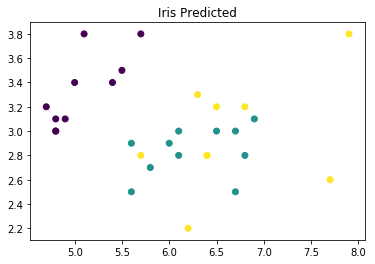

In [37]:
plt.scatter([item[0] for item in X_test], [item[1] for item in X_test], c=colors)
plt.title("Iris Predicted")
plt.show()

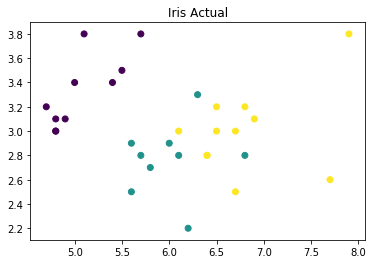

In [38]:
plt.scatter([item[0] for item in X_test], [item[1] for item in X_test], c=colors_actual)
plt.title("Iris Actual")
plt.show()

Видим небольшое расхождение. Давайте посчитаем метрику количества правильно пресказанных объектов (accuracy). Ее тоже несложно реализовать.

In [39]:
correct = 0
for i in range(len(y_test)):
    if y_test[i] == predictions[i]: # считаем количество правильно предсказанных объектов
        correct += 1
        
print(correct, '/', len(y_test))
correct/len(y_test) # находим часть от целого

22 / 30


0.7333333333333333

Из 30 значений, 22 оказалось верным, что дает нам 73% правильности классификации.

## Реализация kNN в виде класса

У нас уже есть все нужные нам кирпичики, поэтому реализуем kNN в виде класса. Он у нас будет состоять из конструктора, где мы инициализруем переменные, метода `dist`, который возвращает евклидово расстояние, метода `fit`, который будет задавать переменные обучающей выборки, и метода `predict`, который будет считать дистанции возвращать нам предсказанные значения. Также создадим метод `score`, считающуй accuracy,  и метод `plot`, который будет рисовать графики.

In [40]:
class KNN:
    """
    k-NN классификатор

    Возвращает: предсказания k-NN
    """

    def __init__(self, k):
        self.X_train = None
        self.y_train = None
        self.k = k
        self.predictions = []

Конструктор у нас будет просто инициализировать переменные. Как правило в ML мы создаем экземпляр класса не на данных, а с определенными параметрами (например, задаем количество соседей). А данные будем уже передавать методу .fit() (обучение). Чтобы обучать нам сначала нужно определить метод, считающий расстояние. Т.к. этот метод не принимает данные напрямую, а будет только вызываться в predict(), то объявим его статическим. Также "скроем" его нижним подчеркиванием (намекнем, что мы не предполагаем, что этот метод должен вызываться от объекта класса).

In [45]:
class KNN:
    """
    k-NN классификатор

    Возвращает: предсказания k-NN
    """

    def __init__(self, k):
        self.X_train = None
        self.y_train = None
        self.k = k
        self.predictions = []
    
    @staticmethod
    def _dist(a, b):
        """
        Расстояние евклида
        Принимает на вход два вектора

        Возвращает: число с плавающей точкой
        """
        return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5

In [47]:
test = KNN(2)
test._dist([2,4],[4,2]) # но проверить, что работает можем!

2.8284271247461903

Теперь давайте определим метод .fit(). Это уже будет динамический метод, который вызывается от экземпляра класса. fit() должен находить расстояние от всех наших тестовых точек до тренировочных.

In [49]:
class KNN:
    """
    k-NN классификатор

    Возвращает: предсказания k-NN
    """

    def __init__(self, k):
        self.X_train = None
        self.y_train = None
        self.k = k
        self.predictions = []
    
    @staticmethod
    def _dist(a, b):
        """
        Расстояние евклида
        Принимает на вход два вектора

        Возвращает: число с плавающей точкой
        """
        return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
    
    def fit(self, X_train, y_train, k):
        """
        Принимает на вход два массива с данными: тренировочный Х и тренировочные лейблы
        """
        self.X_train = X_train
        self.y_train = y_train

Теперь реализуем predict() - здесь уже будет происходить много всего. Метод будет принимать тестовые точки и находить расстояние от них всех до тренировочных точек. Потом будет брать k соседей и предсказывать по ним класс объекта.

In [55]:
class KNN:
    """
    k-NN классификатор

    Возвращает: предсказания k-NN
    """

    def __init__(self, k):
        self.X_train = None
        self.y_train = None
        self.k = k
        self.predictions = []
    
    @staticmethod
    def _dist(a, b):
        """
        Расстояние евклида
        Принимает на вход два вектора

        Возвращает: число с плавающей точкой
        """
        return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
    
    def fit(self, X_train, y_train):
        """
        Принимает на вход два массива с данными: тренировочный Х и тренировочные лейблы
        """
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        """
        Принимает на вход двумерный массив искомых точек

        Возвращает: список предсказаний
        """
        
        for i in range(len(X_test)):
            distances = []
            targets = {}

            for j in range(len(X_train)):
                # пройдем по всем точкам и посчитаем расстояние до них от тестовой точки
                distances.append([self._dist(X_test[i], X_train[j]), j])

            # отсортируем расстояния
            distances = sorted(distances)

            # создадим словарь с k ближайщими значениями
            for j in range(self.k):
                index = distances[j][1]
                if targets.get(y_train[index]) != None:
                    targets[y_train[index]] += 1
                else:
                    targets[y_train[index]] = 1

            # вернем самую часто встречающаюся метку
            self.predictions.append(max(targets,key=targets.get))

        return self.predictions

Давайте попробуем эти методы в деле.

In [56]:
knn = KNN(7)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(pred)

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa']


А теперь давайте еще добавим два метода - подсчет правильности предсказания и рисование графика. plot() будет строить нам два графика - предсказанные значения и правильные "ответы". Метод будет динамическим, но будет принимать один внешний аргумент - y_test. Метод score() давайте для тренировки сделаем статистическим (он будет принимать два внешних списка - предсказанные значения и правильные ответы).

In [21]:
class KNN:
    """
    k-NN классификатор

    Возвращает: предсказания k-NN
    """

    def __init__(self, k):
        self.X_train = None
        self.y_train = None
        self.k = k
        self.predictions = []
    
    @staticmethod
    def _dist(a, b):
        """
        Расстояние евклида
        Принимает на вход два вектора

        Возвращает: число с плавающей точкой
        """
        return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
    
    @staticmethod
    def score(y_test, predictions):
        """
        Принимает на вход два массива с данными: тестовый и предсказанный

        Возвращает: число с плавающей точкой
        """
        correct = 0
        for i in range(len(y_test)):
            if y_test[i] == predictions[i]:
                correct += 1
        return correct/len(y_test)
    
    def fit(self, X_train, y_train):
        """
        Принимает на вход два массива с данными: тренировочный Х и тренировочные лейблы
        """
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        """
        Принимает на вход двумерный массив искомых точек

        Возвращает: список предсказаний
        """
        self.X_test = X_test
        
        for i in range(len(self.X_test)):
            distances = []
            targets = {}

            for j in range(len(self.X_train)):
                # пройдем по всем точкам и посчитаем расстояние до них от тестовой точки
                distances.append([self._dist(self.X_test[i], self.X_train[j]), j])

            # отсортируем расстояния
            distances = sorted(distances)

            # создадим словарь с k ближайщими значениями
            for j in range(self.k):
                index = distances[j][1]
                if targets.get(self.y_train[index]) != None:
                    targets[self.y_train[index]] += 1
                else:
                    targets[self.y_train[index]] = 1

            # вернем самую часто встречающаюся метку
            self.predictions.append(max(targets,key=targets.get))

        return self.predictions

    def plot(self, y_test):
        """
        Принимает на вход массив меток объектов. 

        Возвращает два графика (предсказанные метки и правильные метки)
        """
        colors_test = []
        for c in y_test:
            if c == "Iris-setosa":
                colors_test.append(0)
            elif c == "Iris-versicolor":
                colors_test.append(1)
            else:
                colors_test.append(2)

        plt.scatter([item[0] for item in self.X_test], [item[1] for item in self.X_test], c=colors_test)
        plt.title("Real Data")
        plt.show()

        colors_predict = []
        for c in self.predictions:
            if c == "Iris-setosa":
                colors_predict.append(0)
            elif c == "Iris-versicolor":
                colors_predict.append(1)
            else:
                colors_predict.append(2)

        plt.scatter([item[0] for item in self.X_test], [item[1] for item in self.X_test], c=colors_predict)
        plt.title("Predicted")
        plt.show()


1.0


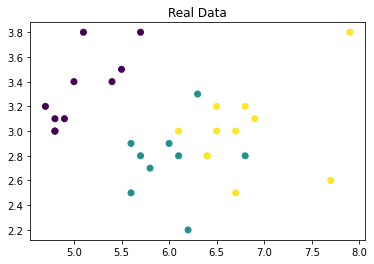

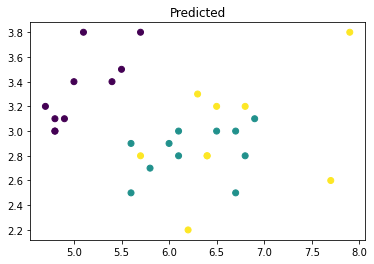

In [22]:
knn = KNN(7)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(knn.score(pred,pred))
knn.plot(y_test)

## Класс kNN с другой функций расстояния

Давайт создадим второй класс kNN, который теперь использует другую функцию расстояния. Создавать второй класс с нуля не будем, а воспользуемся свойством классов - наследование. В новой классе поменяем только функцию расстояния, а все остальное оставим таким же. Для нахождения косинусной меры, используем функцию `cosine` из библиотеки `scipy`.

![](https://datascience-enthusiast.com/figures/cosine_sim.png)

In [86]:
from scipy.spatial import distance

class cosKNN(KNN):
    
    @staticmethod
    def _dist(a,b):
        """
        Через косинусную меру

        возвращаетs: число с плавающей точкой
        """
        return distance.cosine(a,b)

0.6666666666666666


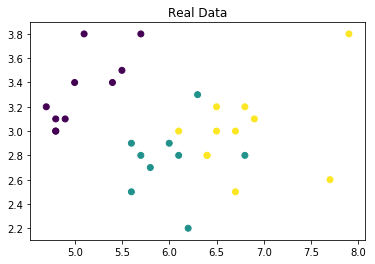

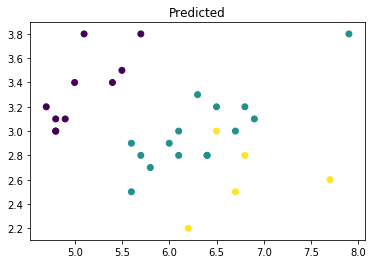

In [89]:
cos_kNN = cosKNN(7)
cos_kNN.fit(X_train,y_train)
pred = cos_kNN.predict(X_test)
print(cosKNN.score(y_test,pred))
cos_kNN.plot(y_test)

## Класс kNN с поддержкой нескольких функций расстояния

Выше мы создали два класса, один из которых наследовался с новой функцией расстояния (метрикой). Но это все можно было реализовать в рамках нашего одного базового класса. Давайте применим все наши знания о классах и создадим его,также модицифируем метод `score` (сделаем его динамическим и будем передавать предсказания, уже полученные внутри класса) и `dist` (добавим функционал выбора метрики, которую будем передавать в конструкторе).

In [130]:
class ultimateKNN:
    """
    k-NN классификатор

    Возвращает: предсказания k-NN
    """

    def __init__(self, k=3, metric='eucl'): # зададим соседей и метрики по умолчанию
        self.X_train = None
        self.y_train = None
        self.k = k
        self.metric = metric
        self.predictions = []
    
    def _dist(self, a, b):
        """
        Расстояние Евклида или косинусная мера
        Принимает на вход два вектора

        Возвращает: число с плавающей точкой
        """
        if self.metric == "eucl":
            return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
        elif self.metric == "cos":
            return distance.cosine(a,b)
    
    def score(self, y_test):
        """
        Принимает на вход массив с тестовыми данными

        Возвращает: число с плавающей точкой
        """
        k = 0
        for i in range(len(y_test)):
            if y_test[i] == self.predictions[i]:
                k += 1
        return k/len(y_test)
    
    def fit(self, X_train, y_train):
        """
        Принимает на вход два массива с данными: тренировочный Х и тренировочные лейблы
        """
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        """
        Принимает на вход двумерный массив искомых точек

        Возвращает: список предсказаний
        """
        self.X_test = X_test
        
        for i in range(len(self.X_test)):
            distances = []
            targets = {}

            for j in range(len(self.X_train)):
                # пройдем по всем точкам и посчитаем расстояние до них от тестовой точки
                distances.append([self._dist(self.X_test[i], self.X_train[j]), j])

            # отсортируем расстояния
            distances = sorted(distances)

            # создадим словарь с k ближайщими значениями
            for j in range(self.k):
                index = distances[j][1]
                if targets.get(self.y_train[index]) != None:
                    targets[self.y_train[index]] += 1
                else:
                    targets[self.y_train[index]] = 1

            # вернем самую часто встречающаюся метку
            self.predictions.append(max(targets,key=targets.get))

        return self.predictions

    def plot(self, y_test):
        """
        Принимает на вход массив меток объектов. 

        Возвращает два графика (предсказанные метки и правильные метки)
        """
        colors_test = []
        for c in y_test:
            if c == "Iris-setosa":
                colors_test.append(0)
            elif c == "Iris-versicolor":
                colors_test.append(1)
            else:
                colors_test.append(2)

        plt.scatter([item[0] for item in self.X_test], [item[1] for item in self.X_test], c=colors_test)
        plt.title("Real Data")
        plt.show()

        colors_predict = []
        for c in self.predictions:
            if c == "Iris-setosa":
                colors_predict.append(0)
            elif c == "Iris-versicolor":
                colors_predict.append(1)
            else:
                colors_predict.append(2)

        plt.scatter([item[0] for item in self.X_test], [item[1] for item in self.X_test], c=colors_predict)
        plt.title("Predicted")
        plt.show()


In [131]:
ult_kNN = ultimateKNN(7,metric='cos')
ult_kNN.fit(X_train,y_train)
print(ult_kNN.predict(X_test))
print(ult_kNN.score(y_test))

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa']
0.6666666666666666


In [132]:
ult_kNN = ultimateKNN(7)
ult_kNN.fit(X_train,y_train)
print(ult_kNN.predict(X_test))
print(ult_kNN.score(y_test))

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa']
0.7333333333333333


Давайте теперь сделаем сетку - построим несколько кнн классификаторов с разными `k` и посмотрим какой из них круче.

In [136]:
for k in range(1,10):
    knn = ultimateKNN(k, metric='cos')
    knn.fit(X_train,y_train)
    knn.predict(X_test)
    print("k = " + str(k), ", Score: " + str(knn.score(y_test)))

k = 1 , Score: 0.7
k = 2 , Score: 0.7
k = 3 , Score: 0.6666666666666666
k = 4 , Score: 0.6
k = 5 , Score: 0.6333333333333333
k = 6 , Score: 0.6666666666666666
k = 7 , Score: 0.6666666666666666
k = 8 , Score: 0.7333333333333333
k = 9 , Score: 0.6666666666666666


In [137]:
for k in range(1,10):
    knn = ultimateKNN(k)
    knn.fit(X_train,y_train)
    knn.predict(X_test)
    print("k = " + str(k), ", Score: " + str(knn.score(y_test)))

k = 1 , Score: 0.8
k = 2 , Score: 0.8
k = 3 , Score: 0.8
k = 4 , Score: 0.8666666666666667
k = 5 , Score: 0.8
k = 6 , Score: 0.8666666666666667
k = 7 , Score: 0.7333333333333333
k = 8 , Score: 0.8
k = 9 , Score: 0.8


Как мы видим, евклидово расстояние на нашем датасете работает лучше.

# Заключение

Мы познакомились с классами и создали в качестве примера класс, который реализует метод kNN. kNN — один из простейших алгоритмов классификации, у которого все же есть свои недостатки. Помимо точности классификации, проблемой этого классификатора является скорость классификации: если в обучающей выборке `N` объектов, в тестовой выборке `M` объектов, а размерность пространства — `K`, то количество операций для классификации тестовой выборки может быть оценено как `O(K\*M\*N)`. 